In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

data = pd.read_csv('ayush dai a2.csv' )

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


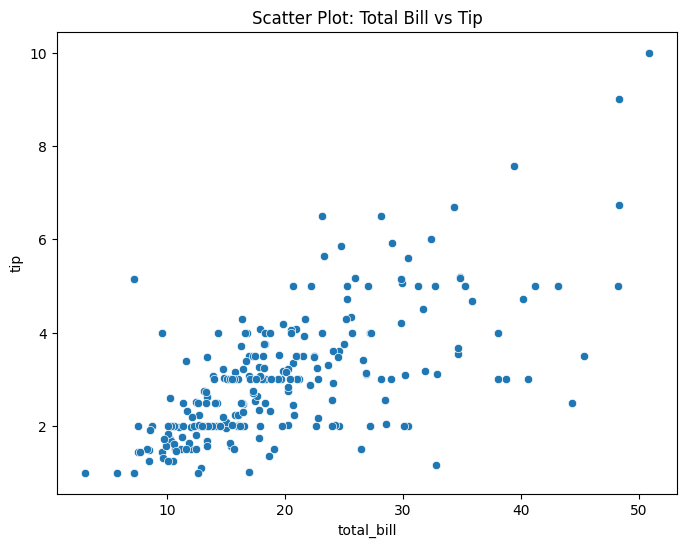

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="total_bill", y="tip")
plt.title("Scatter Plot: Total Bill vs Tip")
plt.show()


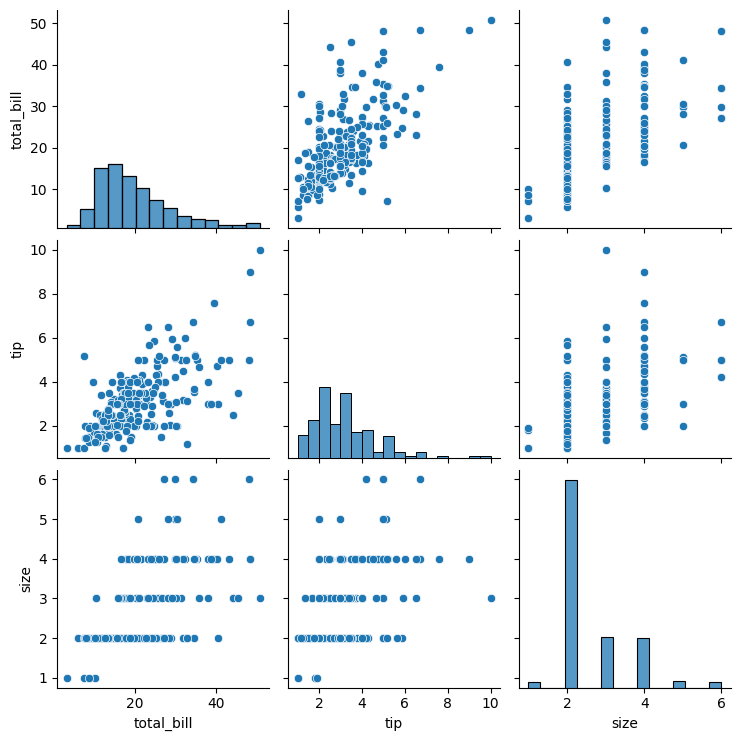

In [ ]:
sns.pairplot(data)
plt.show()


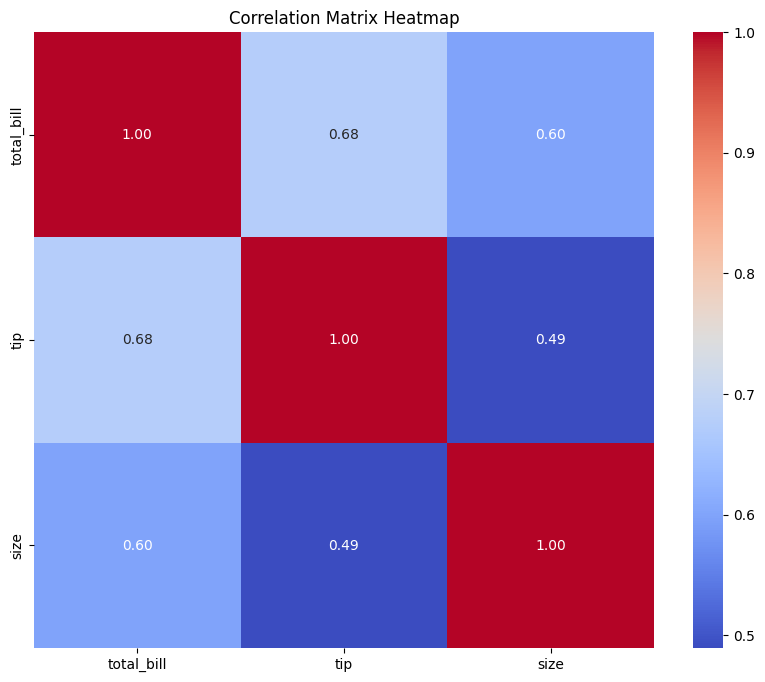

In [ ]:
plt.figure(figsize=(10, 8))

numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



In [ ]:
X_rainbow = data[["total_bill", "size"]]
y_rainbow = data["tip"]
X_rainbow = sm.add_constant(X_rainbow)  
model = sm.OLS(y_rainbow, X_rainbow).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test p-value: {rainbow_p_value}")


Rainbow Test p-value: 0.17048935693447642


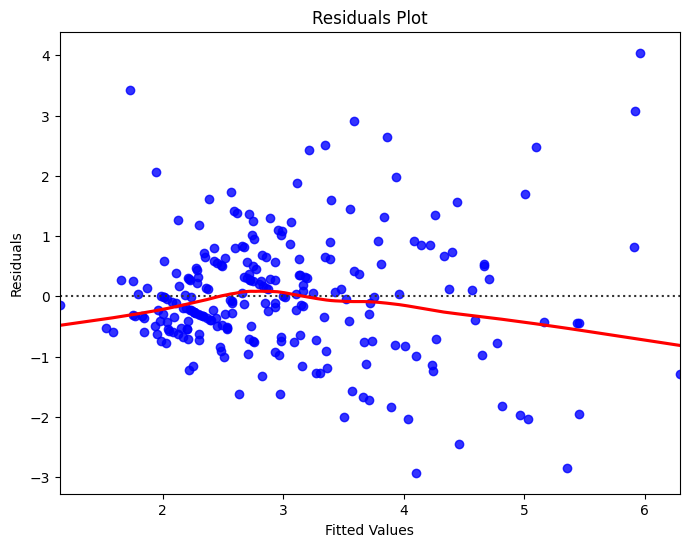

In [ ]:
y_pred_rainbow = model.predict(X_rainbow)
residuals = y_rainbow - y_pred_rainbow

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_rainbow, y=residuals, lowess=True, color="blue", line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


In [ ]:
X = data.drop(columns=["tip"])
y = data["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


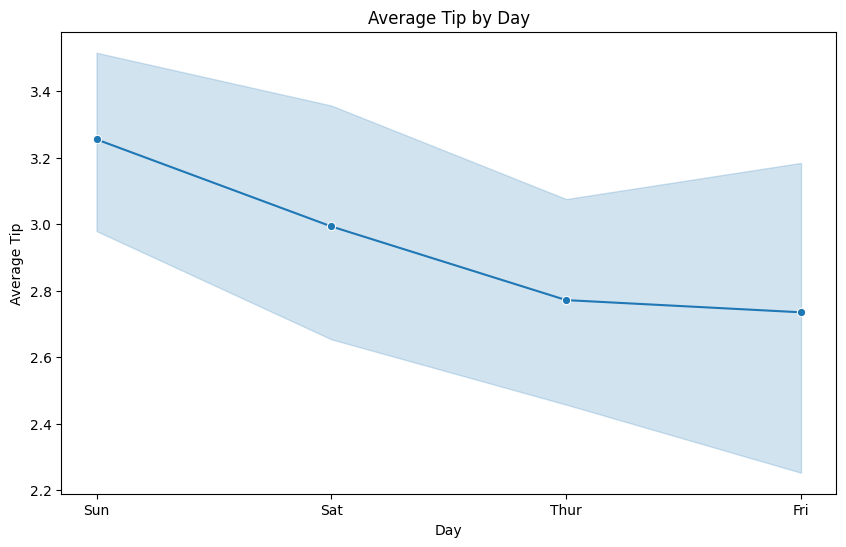

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop('tip', axis=1)  
y = data_encoded['tip']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))
    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}")



Linear Regression: RMSE = 0.84, R² = 0.44
Ridge Regression: RMSE = 0.84, R² = 0.44
Lasso Regression: RMSE = 0.75, R² = 0.55
Decision Tree: RMSE = 1.12, R² = -0.00
Random Forest: RMSE = 0.96, R² = 0.26
SVR: RMSE = 0.73, R² = 0.57
KNN: RMSE = 0.94, R² = 0.30


In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R²"]).sort_values(by="R²", ascending=False)
print(results_df)


Empty DataFrame
Columns: [Model, RMSE, R²]
Index: []


In [ ]:

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R²"])

results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)

if results_df.empty:
    print("Error: The results DataFrame is empty. Check the model evaluation loop.")
else:
    print("Insights based on best model performance:")
    best_model = results_df.iloc[0]["Model"]
    print(f"The best-performing model is {best_model}.")
    if best_model == "Linear Regression":
        print("Significant factors influencing tips are derived from the linear regression coefficients.")
        coefficients = pd.DataFrame({
            "Feature": X_train.columns,
            "Coefficient": models["Linear Regression"].coef_
        })
        print(coefficients)


Insights based on best model performance:
The best-performing model is SVR.


   total_bill     sex smoker  day    time  size
0       16.99  Female     No  Sun  Dinner     2
1       10.34    Male     No  Sun  Dinner     3
2       21.01    Male     No  Sun  Dinner     3
3       23.68    Male     No  Sun  Dinner     2
4       24.59  Female     No  Sun  Dinner     4
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64


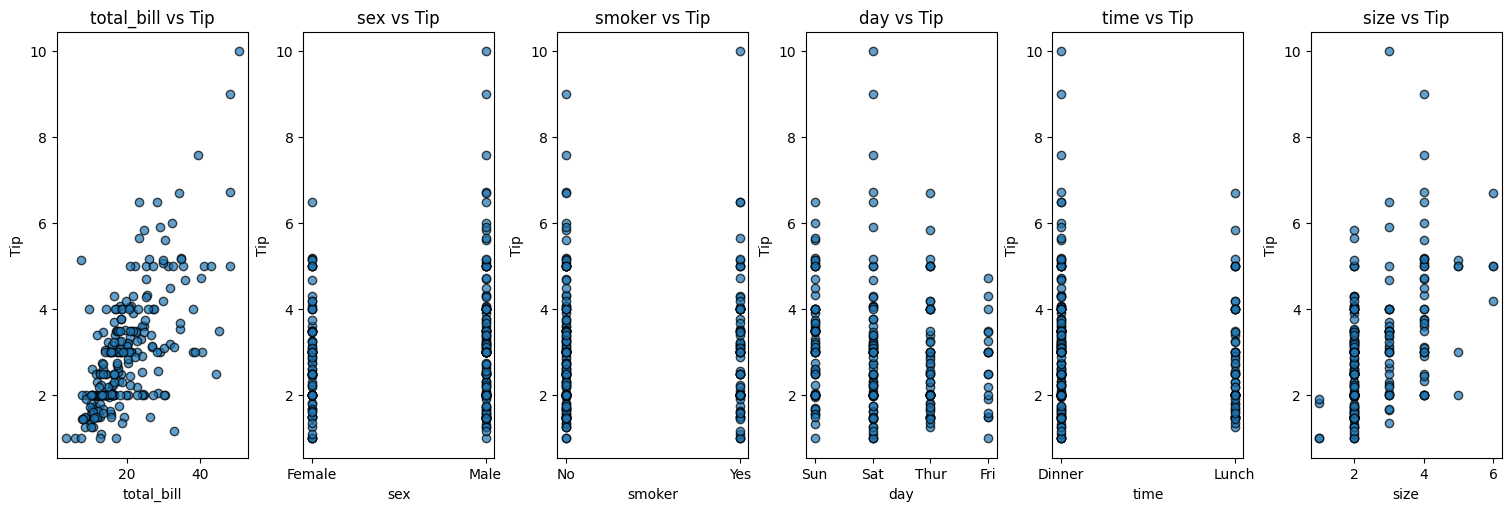

In [ ]:
file_path = "/mnt/data/tips (data for regression problem) (1).csv"
df = pd.read_csv( 'ayush dai a2.csv' )

df_data = df.drop(columns=['tip'])
df_target = df['tip']

print(df_data.head())
print(df_target.head())

num_columns = len(df_data.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(15, 5), constrained_layout=True)

for i, ax in enumerate(axes):
    ax.scatter(df_data.iloc[:, i], df_target, alpha=0.7, edgecolors='k')
    ax.set_xlabel(df_data.columns[i])
    ax.set_ylabel('Tip')
    ax.set_title(f'{df_data.columns[i]} vs Tip')

plt.show()

